# Gradient Descent

Suppose we want to solve $\min F(w)$ or $\min_w E_{in} (w) \quad (F(w) = \frac{1}{n} \sum_{i=1}^n f_i (w) )$. $E_{in}(w)$ represents the in-sample loss (or training loss). In general $E_{in}(w) = \frac{1}{N} \sum_{i=1}^N f_i(w)$. In machine learning, we want to find the hypothesis that minimizes $E_{in}(w). 

<u>Convex functions</u>: 

$\nabla F(w^\star) = 0 \Longleftrightarrow w^\star$ is a global minimum. A function is convex if $\nabla^2 F[w]$ is positive definite. Ex. linear regression, logistic regression, ...

<u>Non-convex functions</u>: 

$\nabla F(w^\star) = 0 \Longleftrightarrow w^\star$ is global minimum, local minimum, OR saddle point.

Most algorithms only converge to gradient = 0

For example, **Neural Networks**

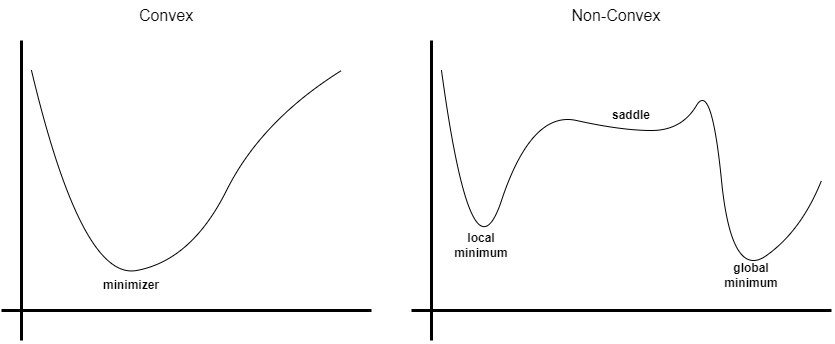

In [1]:
from utils import disp
disp('nn_gradient_basic.drawio.png')

The gradient descent update rule can be written in terms of the gradient. The original GD update is the same as the one of the steepest descent. 

$$w^{(t+1)} = w^{(t)} - \alpha^{(t)} \nabla F (w^{(t)})$$

where $\alpha^{(t)}$ is called the step size.

<u>Step size</u>: several methods are available to choose the step size.

i). Fixed step size: $\alpha^{(t)} = \alpha, \forall t$

ii). Exact line search: $\alpha^{(t)} = arg\min_{\alpha} F(w^{(t)} + \alpha d^{(t)})$ where $d^{(t)} = - \nabla F(w^{(t)})$.

iii). Inexact line search - (See Amijo/Wolfe conditions)

In machine learning, we use option (i). So, the GD update rule becomes $w^{t+1} = w^{(t)} - \alpha F( w^{(t)} )$ where $\alpha > 0$ is the step size (or learning rate). In general, $\alpha$ is one of the most important hyperparameter of a learning algorithm. It's very important to tune it. $\alpha$ too large can cause instability, causing divergence. $\alpha$ too small can slow progress, making it too slow to converge. Most importantly, one tries a bunch of values and pick the one which works the best.

### Algorithm

1. Initialize $w \xrightarrow{} w^{(0)}$

2. For $t=1, 2, ...$ do

    i. Compute $\nabla F(w^{(t)})$

    ii. Update $w^{(t+1)} = w^{(t)} - \alpha \nabla F ( w^{(t)})$

3. return $w^{(t)}$


### Convergence

Let $X^\star$ be the global minimizer. Assume the following:

i. $f$ is twice differentiable so that $\nabla^2 f$ exists

ii. $0 \leq \lambda \min I \leq \nabla^2 f(x) \leq \lambda \max I$ for all $X \in \mathcal{R}^n$.

iii. Run GD with exact line search

Then, $f(X^{(t)}) \xrightarrow{} f(X^\star)$ as $t \xrightarrow{} \infty$

Proof is in Nocedal-Wright, Ch.3, Thm 3.3.

### Advice on Gradient Descent

GD is useful because 1) it is simple to implement, and 2) low computational cost per iteration (no matrix inversion). It requires only first order derivative (i.e. no hessian).

Most machine learning has built-in (stochastic) gradient descent. When building one, be aware of following:

1) Convex non-differentiable problem (L1-norm)

2) Non-convex problem, e.g. ReLU in deep network

3) Trap by local minima

4) Inappropriate step size

**Example**: Consider the problem of minimizing $f(x,y) = 4x^2 - 4xy + 2y^2$ using the gradient descent method. 

**Solution**: We knew that the solution is $(0,0)$. First, let's compute the gradient

$$\nabla f(\underset{\sim}{X}) - \nabla f(X, y) = \begin{pmatrix}
\frac{df}{dx}\\
\frac{df}{dy}\\
\end{pmatrix} = \begin{pmatrix}
8x-4y\\
-4x+4y\\
\end{pmatrix}$$

Starting from initial point,

$$\underset{\sim}{X}^{(0)} = (X^{(0)}, y^{(0)}) = (2,3)$$

We want to find the next point $\underset{\sim}{X}^{(1)} = \underset{\sim}{X}^{(0)} - \alpha \nabla f(\underset{\sim}{X}^{(0)})$. Assuming that $\alpha = \frac{1}{2}$, then 

$$\underset{\sim}{X}^{(1)} = (X^{(1)}, y^{(1)}) = \begin{pmatrix}2\\3\\\end{pmatrix} - \frac{1}{2} \begin{pmatrix}4\\4\\\end{pmatrix} = \begin{pmatrix}0\\1\\\end{pmatrix}$$

*Check for convergence:* If not convergence, continue to $\underset{\sim}{X}^{(2)}$ and repeat the process until convergence.

## Stochastic Gradient Descent (SGD)

In machine learning, our cost loss function general consists of the average of costs or losses for individual training samples. This means that most loss functions in ML problems are separable

$$J(\underset{\sim}{\theta}) = \frac{1}{N} \sum_{n=1}^N \mathcal{L} (g_\theta (X^n), y^{(n)}) = \frac{1}{N} \sum_{n=1}^N J_n (\underset{\sim}{\theta})$$

**Example**: 

i. Square loss

$$J(\underset{\sim}{\theta}) = \frac{1}{N} \sum_{n=1}^N (g_\theta (X^n) - y^{n})^2$$

ii. Cross-entropy loss

$$J(\underset{\sim}{\theta}) = - \sum_{n=1}^N \Bigl\{ y^n \log g_\theta (X^n) + (1 - y^n) \log (1 - g_\theta (X^n)) \Bigr\}$$

iii. Logistic loss

$$J(\underset{\sim}{\theta}) = \sum_{n=1}^N \log (1 + \exp (-y^{n \theta^T X^n}) )$$

Recall for GD, $\underset{\sim}{\theta}^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta^{(t)})$. The main computation is $\nabla J(\theta^{(t)})$. By linearity of derivatives, the gradient is the average of all the gradients for individual examples:

$$\nabla J(\theta) = \frac{1}{N} \sum_{n=1}^N \nabla J_n (\theta) \quad \hbox{is the full gradient of the loss}$$

This means that if we use this formula directly, we must visit every training example to compute the gradient. This is known as batch training since we are treating the entire training set as a batch But this can be very time-consuming and it is also unnecessary. We can get a stochatic estimate of the gradient from a single training sample. Instead of computing the sum of all gradients, SGD selects an observation uniformly at random, say $n$, and uses $\nabla J_n (\theta)$ as an estimator for $\nabla J(\theta) \quad ( \nabla J(\theta) = \frac{1}{N} \sum_{n=1}^N \nabla J_n (\theta) )$.

$$\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_n (\theta^{(t)})$$

## Algorithm

1. Initialize $\theta \xrightarrow{} \theta^{(0)} = 0$ or randomly

2. For $t = 1,2,3,...$, 

    i. Sample 1 observation $n$ uniformly at random

    ii. Update $\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_n (\theta^{(t)})$

In practice, we don't compute the gradient on a single example, but rather compute an average overa a batch of $B$ training examples. Recall the full graident of hte loss

$$\nabla J(\theta) = \frac{1}{N} \sum_{n=1}^N \nabla J_n (\theta)$$

For SGD (mini-batch), $\nabla J(\theta) \approx \frac{1}{B} \sum_{n\in B} \nabla J_n (\theta)$ where $B \leq \{ 1, 2, ..., N \}$ is a random subset and $|B|$ is the batch size.

## Mini-batch SGD Algorithm

1. Initialize $\theta \xrightarrow{} \theta^{(0)} = 0$ or randomly

2. For $t=1,2,3,...$,

    i. Draw a random subset $B \leq \{ 1, 2, ..., N \}$

    ii. Update $\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{|B|} \sum_{n \in B} \nabla J_n (\theta^{(t)})$


**The approximate gradient is unbiased:**

$$E[ \frac{1}{|B|} \sum_{n\in B} \nabla J_n (\theta) ] = \nabla J(\theta)$$

If all operations were equally expensive, one would always prefer to use $B=1$. We don't want to make $B$ too large, because then it takes too long to compute the gradients. In the extreme case where $B=N$, we get back the batch gradient descent.

### Interpreting SGD

Recall the SGD step is unbiased. Unbiased gradient implies that each update is gradient + zero-mean noise. 

Step size: SGD with constant size <u>does not converge</u>. If $\theta^\star$ is a minimizer, then $J(\theta^\star) = \frac{1}{N} \sum_{n=1}^N J_n (\theta^\star) = 0$.

But, $\frac{1}{|B|} \sum_{n \in B} J_n (\theta^\star) \neq 0$, since $B$ is a subset. **Typical strategy:** start with a large step size and gradually decrease $\alpha^t \xrightarrow{} 0$ (e.g. $\alpha^t = t^{-a}$) for some constant $a$.

### Summary

Compared to GD in convex problems, SGD offers as trade-off between accuracy and efficiency. It involves more iterations, less gradient evaluation per iteration.

**Recent studies** of SGD for non-convex problems found that: 

* SGD for training deep neural networks works

* SGD finds solution faster

* SGD finds a better local minima

* Noise matters


**Exercise:** Find the gradient for this loss function, $\nabla J(\theta)$ using following information

$$h_\theta (x) = \theta^T X$$

$$\underset{\sim}{\theta} = (\theta_0, \theta_1, ..., \theta_n) \qquad \underset{\sim}{X} = (1, X_1, ..., X_n)$$

$$J(\theta) = \frac{1}{2} \sum_{i=1}^n (h_\theta (X^{(i)} - y^{(i)}))^2 \xrightarrow{} SSE$$
